# Astropy

The library [Astropy](http://www.astropy.org/) started as an effort to merge several astronomy related libraries (pyfits/asciitable/pywcs...) to read fits/ascii tables and convert astronomical coordinates. It evolved to become much more, including units/quantities cosmological calculation

* [Fits Files](#Fits-Files)
* [Ascii Files](#Ascii-Files)
* [Quantities and Constants](#Quantities-and-Constants)
* [Cosmological Calculations](#Cosmological-Calculations)
* [and more..](#And-there-is-more)

In [1]:
# uncomment this line if you are using python 2
# from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = 10, 10
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['axes.labelsize'] = 'large'

## Fits Files

### Reading a fits file (pyfits)

In [53]:
from astropy.io import fits as pyfits

filename = "../data/data.fits"

Get quick information on the mutli-extension FITS file

In [52]:
pyfits.info(filename)

Filename: ../data/data.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     151   ()              
1    image       ImageHDU        52   (273, 296)   float64   
2    error       ImageHDU        20   (273, 296)   float64   
3    coverage    ImageHDU        20   (273, 296)   float64   
4    History     ImageHDU        23   ()              
5    HistoryScript  BinTableHDU     39   105R x 1C    [300A]   
6    HistoryTasks  BinTableHDU     46   77R x 4C     [1K, 27A, 1K, 9A]   
7    HistoryParameters  BinTableHDU     74   614R x 10C   [1K, 20A, 7A, 46A, 1L, 1K, 1L, 74A, 11A, 41A]   


Read the 'image' extension into a `numpy.array`, together with the FITS header

In [55]:
image, header = pyfits.getdata(filename, 'image', header=True)

print(type(image), type(header))

<class 'numpy.ndarray'> <class 'astropy.io.fits.header.Header'>


The image contains the actual data

In [4]:
print(image[100:103,100:103]) # image contains the actual data

[[ -4.11007153e-03  -7.81326587e-03  -9.84336429e-03]
 [  7.26953717e-03  -1.03521749e-02  -1.29196560e-02]
 [  1.93565889e-04  -7.28653757e-03  -7.75454198e-05]]


The header describes the image in terms of astrometry/unit/size

Here are the first 10 lines of `header`.

In [57]:
header[:10]

XTENSION= 'IMAGE   '           / Java FITS: Wed Aug 14 11:37:21 CEST 2013       
BITPIX  =                  -64                                                  
NAXIS   =                    2 / Dimensionality                                 
NAXIS1  =                  273                                                  
NAXIS2  =                  296                                                  
PCOUNT  =                    0 / No extra parameters                            
GCOUNT  =                    1 / One group                                      
LONGSTRN= 'OGIP 1.0'           / The OGIP long string convention may be used.   
COMMENT This FITS file may contain long string keyword values that are          
COMMENT continued over multiple keywords.  This convention uses the  '&'        

**Warning:** axes in FITS files and NumPy arrays are inverted

In [51]:
print((header['naxis1'], header['naxis2'])) # this correpond to the size of the image
print(image.shape)

(273, 296)
(296, 273)


### Sky Coordinates Manipulation (pyWCS)

In [9]:
from astropy import wcs as pywcs
wcs = pywcs.WCS(header) # You can use the header to create a wcs (World Coordinate System) object.

In [10]:
ra, dec = wcs.wcs_pix2world(0.,0.,0) # sky coordinate of the center of the first pixel (0,0)
print(ra, dec)
x, y = wcs.wcs_world2pix(ra,dec,0) # back to pixel coordinate
print(x, y)

30.31868700299246 -25.156760607162155
-2.2737367544323206e-12 -1.8474111129762605e-12


### Plotting using matplotlib

Nice dedicated libraries:
  - [pywcsgrid2](http://leejjoon.github.io/pywcsgrid2)
  - [APLpy](http://aplpy.github.io/)

Raw/pixel index plot of the image with `imshow`

- `cmap`: matplotlib colormap used
- `vmin`, `vmax`: lower and upper boundaries for the colorbar
- `origin`: where to display the [0, 0] value ('lower' = in the lower left corner)

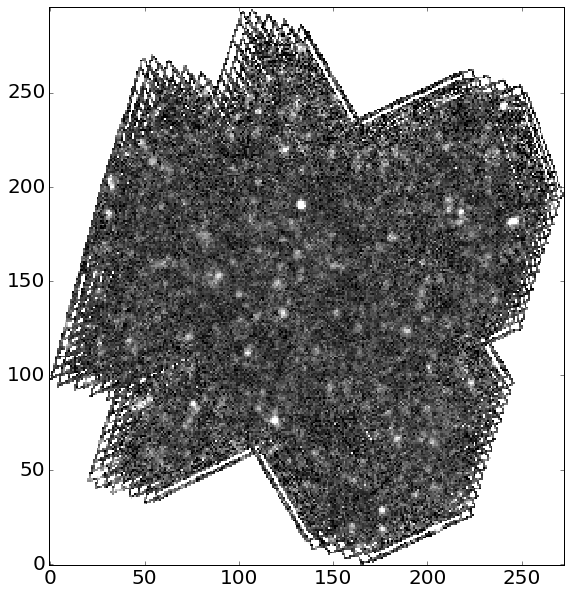

In [11]:
plt.imshow(image, cmap='gray', origin='lower', interpolation='None', vmin=-2e-2, vmax=5e-2)

Let's add information to the plot with interactive plotting (only available in notebooks)

In [12]:
%matplotlib notebook
plt.ion()

<IPython.core.display.Javascript object>


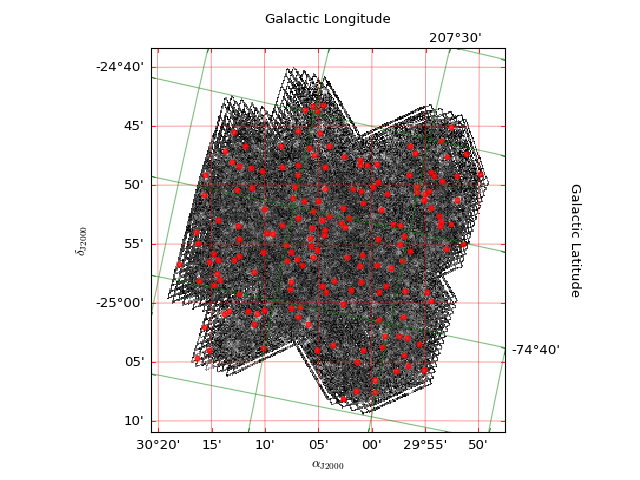

In [13]:
fig = plt.figure()
ax_wcs = fig.add_subplot(1, 1, 1, projection=wcs)
ax_wcs.imshow(image, cmap='gray', origin='lower', interpolation='None', vmin=-2e-2, vmax=5e-2)

Change the frame labels

In [14]:
ax_wcs.coords['ra'].set_axislabel(r'$\alpha_\mathrm{J2000}$')
ax_wcs.coords['dec'].set_axislabel(r'$\delta_\mathrm{J2000}$')

Change tick style and add a coordinate grid

In [15]:
ax_wcs.coords['ra'].set_ticks(color='red')
ax_wcs.coords['dec'].set_ticks(color='red')
ax_wcs.coords.grid(color='red', linestyle='solid', alpha=0.7)

Add some overlay in a different frame (here galactic)

In [16]:
overlay = ax_wcs.get_coords_overlay('galactic')
overlay.grid(color='green', linestyle='solid', lw=1.0, alpha=0.5)

Add ticks and labels

In [17]:
overlay['l'].set_ticks(color='green')
overlay['l'].set_axislabel('Galactic Longitude')
overlay['b'].set_ticks(color='green')
overlay['b'].set_axislabel('Galactic Latitude')

## ASCII Files

This package can read and write in most of the ascii format that are used in astronomy http://cxc.harvard.edu/contrib/asciitable/

### ASCII tables

In [18]:
from astropy.io import ascii as asciitable

catalog = asciitable.read('../data/sources.txt') # ASCII w/wo header - CSV - IPAC - CdS - Daophot - LaTex
print(catalog)

      ra           dec             x       ...    bgMinusErr       quality   
------------- -------------- ------------- ... ---------------- -------------
30.0736543481 -24.8389847181 133.076596062 ... 0.00280563968109 24.0841967062
30.0997563127  -25.030193106 118.886083699 ... 0.00310958937187 16.5084425251
29.9942788599 -25.1096034937 176.201319623 ... 0.00325032853805 9.89491008533
  29.91794919  -24.846186405 217.852553446 ... 0.00283227511184  9.3797188144
29.8763509609 -24.7518860739 240.583543382 ... 0.00466051306854 9.08251222505
29.8668948822 -24.8539846811 245.642862323 ... 0.00330155226713 8.43689223988
30.1256090651 -24.9699609047 104.817408355 ... 0.00278613735733 8.19832920568
30.1341184911 -24.9186418851 100.175324745 ... 0.00256138723823 7.81807474971
30.1539556185 -24.9026093657 89.3753876155 ... 0.00251952074747 7.81133676519
29.9797930641 -25.0463249901 184.097726865 ... 0.00291029625116 6.89071877371
          ...            ...           ... ...              ... 

Transform the (RA, DEC) position of the sources to pixel coordinate

In [19]:
(x,y) = wcs.wcs_world2pix(catalog['ra'], catalog['dec'], 0)

Overplot the sources from the catalog

In [20]:
ax_wcs.scatter(x, y, color='r', alpha=0.8)

### ASCII table to $\LaTeX$ table...

In [21]:
asciitable.write(catalog,'sources.tex', Writer=asciitable.Latex)

Quick check

In [22]:
!head -5 sources.tex

\begin{table}
\begin{tabular}{ccccccccccccccccccc}
ra & dec & x & y & raPlusErr & decPlusErr & raMinusErr & decMinusErr & xPlusErr & yPlusErr & xMinusErr & yMinusErr & flux & fluxPlusErr & fluxMinusErr & background & bgPlusErr & bgMinusErr & quality \\
30.0736543481 & -24.8389847181 & 133.076596062 & 190.787365523 & 0.000137260656107 & 0.000124562849667 & 0.000137260656103 & 0.000124562850274 & 0.0747378051241 & 0.0747378051241 & 0.0747378051241 & 0.0747378051241 & 157.862010775 & 6.55458899877 & 6.55458899877 & -0.00492962840045 & 0.00280563968109 & 0.00280563968109 & 24.0841967062 \\
30.0997563127 & -25.030193106 & 118.886083699 & 76.0608399428 & 0.000200560356177 & 0.00018172429472 & 0.000200560356813 & 0.000181724292183 & 0.109035119289 & 0.109035119289 & 0.109035119289 & 0.109035119289 & 118.448614593 & 7.17503267878 & 7.17503267878 & 0.00226922676457 & 0.00310958937187 & 0.00310958937187 & 16.5084425251 \\


### VO Tables

In [23]:
import astropy.io.votable  as vo_table

votable = vo_table.from_table(catalog)
vo_table.writeto(votable, 'sources.xml')

In [24]:
!head -10 sources.xml

<?xml version="1.0" encoding="utf-8"?>
<!-- Produced with astropy.io.votable version 1.1.2
     http://www.astropy.org/ -->
<VOTABLE version="1.2" xmlns="http://www.ivoa.net/xml/VOTable/v1.2" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://www.ivoa.net/xml/VOTable/v1.2">
 <RESOURCE type="results">
  <TABLE>
   <FIELD ID="ra" datatype="double" name="ra"/>
   <FIELD ID="dec" datatype="double" name="dec"/>
   <FIELD ID="x" datatype="double" name="x"/>
   <FIELD ID="y" datatype="double" name="y"/>


## Quantities and Constants

Astropy defines quantities as number with unit

In [25]:
from astropy import units as u

wavelength = 1.2 * u.millimeter
diameter = 30 * u.m

airy = 1.22 * wavelength/diameter

print(wavelength)
print(airy)
print(airy.decompose()) # unit change is made

1.2 mm
0.048799999999999996 mm / m
4.88e-05


Conversions are made easy

In [26]:
distance = 1.0 * u.parsec

print( distance.to(u.km) )

30856775814671.914 km


In the same way, astropy define usefull constants with their units

In [27]:
from astropy import constants as const

print(const.c)
print(const.c.to('km/s'))

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2010
299792.458 km / s


In [28]:
frequency = 857 * u.GHz
wavelength = const.c / frequency
wavelength.to(u.micron)

<Quantity 349.81617036172696 micron>

We can verify this works both ways

In [29]:
frequency.to(u.micron, equivalencies=u.spectral())

<Quantity 349.81617036172696 micron>

## Cosmological Calculations

Astropy allow for calculating the commonly used quantities as function of redshift, line distances, ages and loockback times

Cosmological constraints from different surveys are given

In [30]:
from astropy.cosmology import Planck15 as cosmo

In [31]:
print(cosmo)

FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[ 0.    0.    0.06] eV, Ob0=0.0486)


We can build a redshift range and draw various cosmological distances

In [32]:
z = np.logspace(-2, 1, 100)

lumdist = cosmo.luminosity_distance(z)
angdist = cosmo.angular_diameter_distance(z)

Cosmological quantities from Astropy always come with units

In [33]:
print(lumdist[0:5])

[ 44.59510194  47.84401409  51.33161551  55.07573575  59.09557883] Mpc


Display the distances with a log-linear plot

<IPython.core.display.Javascript object>


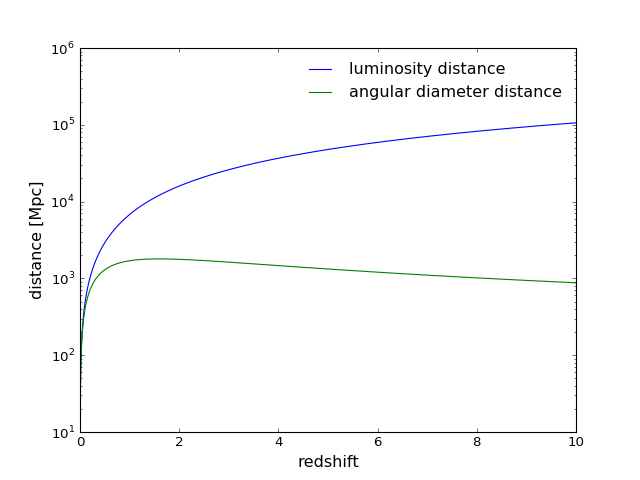

In [39]:
fig, ax = plt.subplots()
ax.semilogy(z, lumdist, label='luminosity distance')
ax.semilogy(z, angdist, label='angular diameter distance')

Add labels using internal units info

In [40]:
ax.set_xlabel('redshift')
ax.set_ylabel('distance [%s]' % lumdist.unit)

Add a legend without frame around

In [42]:
ax.legend(frameon=False)

In [78]:
import astropy.visualization as viz

Create routine to visualy compare plots

In [115]:
def plot_compare_stretch(stretchedimg, imglabel):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    ax[0].imshow(image, cmap='gray', origin='lower', interpolation=None)
    ax[0].axis('off')
    ax[0].set_title('Original image', fontsize=16)
    ax[1].imshow(stretchedimg, cmap='gray', origin='lower', interpolation=None)
    ax[1].set_title(imglabel, fontsize=16)
    ax[1].axis('off')

The `scale_image` method to mimic DS9 scales: linear, log, sqrt, asinh..

<IPython.core.display.Javascript object>


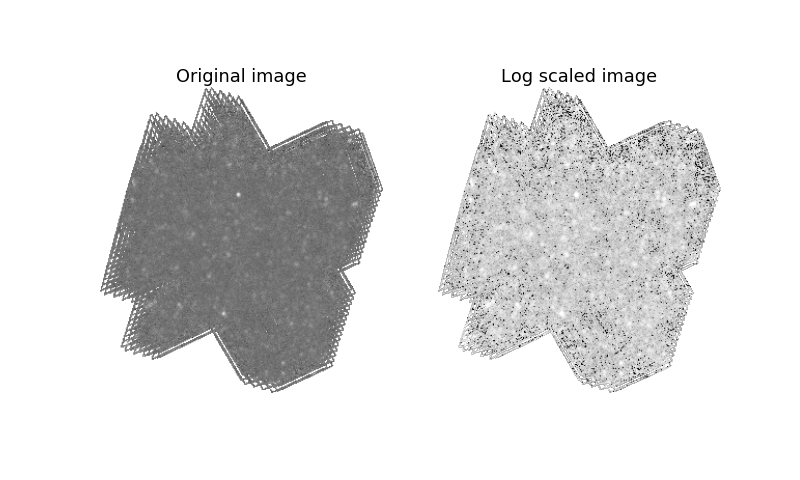

In [119]:
sclimg = viz.scale_image(image, scale='log', min_cut=-2e-2, max_cut=5e-2)

plot_compare_stretch(sclimg, 'Log scaled image')

The logarithmic scaling can also be fine tuned..

<IPython.core.display.Javascript object>


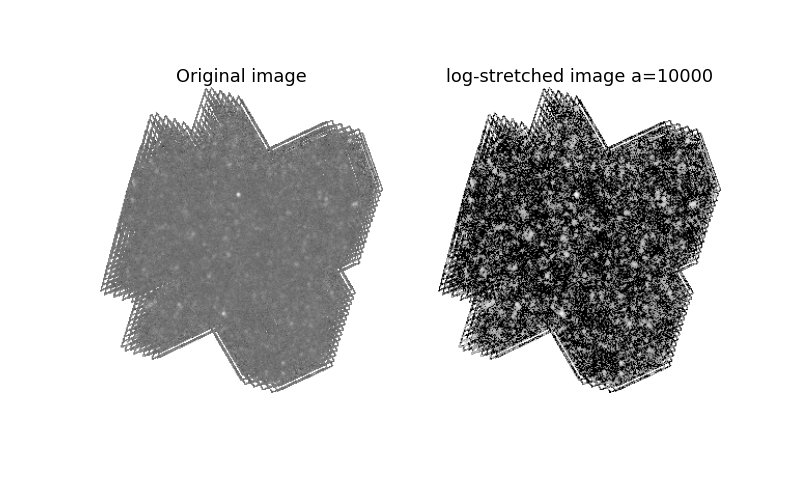

In [118]:
a = 10**4
stretch = viz.LogStretch(a=a)
logimage = stretch(image.copy())

plot_compare_stretch(logimage, 'log-stretched image a=%d' % a)

## And there is more

* [`astropy.modeling`](http://docs.astropy.org/en/stable/modeling/index.html) to provide a framework for representing 1-D and 2-D models and performing model fitting with parameter constraints.
* [`astropy.coordinates`](http://docs.astropy.org/en/stable/coordinates/index.html) to work with various sky coordinates and angles
* [`astropy.convolution`](http://docs.astropy.org/en/stable/convolution/index.html) to provide convolution functions and kernels that offers improvements compared to scipy routines
* [`astropy.visualization`](http://docs.astropy.org/en/stable/visualization/index.html) to optimize the color stretch in your images

---

In [43]:
from IPython.core.display import HTML
HTML(open('../styles/notebook.css', 'r').read())